In [1]:
library("dplyr")
library("ggplot2")
library("lubridate")
library("scales")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
df=read.csv("/content/Copy of WALMART_SALES_DATA.csv")

In [3]:
summary(df)

     Store        Date            Weekly_Sales      Holiday_Flag    
 Min.   : 1   Length:6435        Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   Class :character   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Mode  :character   Median : 960746   Median :0.00000  
 Mean   :23                      Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34                      3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45                      Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

In [4]:
head(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,05-02-2010,1643691,0,42.31,2.572,211.0964,8.106
2,1,12-02-2010,1641957,1,38.51,2.548,211.2422,8.106
3,1,19-02-2010,1611968,0,39.93,2.514,211.2891,8.106
4,1,26-02-2010,1409728,0,46.63,2.561,211.3196,8.106
5,1,05-03-2010,1554807,0,46.50,2.625,211.3501,8.106
6,1,12-03-2010,1439542,0,57.79,2.667,211.3806,8.106


In [5]:
tail(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
6430,45,21-09-2012,723086.2,0,65.32,4.038,191.8567,8.684
6431,45,28-09-2012,713173.9,0,64.88,3.997,192.0136,8.684
6432,45,05-10-2012,733455.1,0,64.89,3.985,192.1704,8.667
6433,45,12-10-2012,734464.4,0,54.47,4.000,192.3273,8.667
6434,45,19-10-2012,718125.5,0,56.47,3.969,192.3309,8.667
6435,45,26-10-2012,760281.4,0,58.85,3.882,192.3089,8.667


In [6]:
dim(df)

[1] 6435    8

In [7]:
class(df)

[1] "data.frame"

In [8]:
table(df$Holiday_Flag)


   0    1 
5985  450 

In [9]:
table(df$Store)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 
 41  42  43  44  45 
143 143 143 143 143 

In [10]:
sum(is.na(df))

[1] 0

In [11]:
colSums(is.na(df))

Store         Date Weekly_Sales Holiday_Flag  Temperature   Fuel_Price 
           0            0            0            0            0            0 
         CPI Unemployment 
           0            0

In [12]:
all(duplicated(df)==TRUE)

[1] FALSE

In [13]:
# which store has maximum sales

df$Store<-as.character(df$Store)
df$Store<-factor(df$Store,levels=unique(df$Store))

In [14]:
Str_sales<-aggregate(Weekly_Sales~Store,data=df,sum)
Str_sales

Store,Weekly_Sales
<fct>,<dbl>
1,222402809
2,275382441
3,57586735
4,299543953
5,45475689
6,223756131
7,81598275
8,129951181
9,77789219


In [15]:
colnames(Str_sales)[2]<-"tot_sales_store"

In [16]:
Str_sales<-arrange(Str_sales,desc(tot_sales_store))
Str_sales

Store,tot_sales_store
<fct>,<dbl>
20,301397792
4,299543953
14,288999911
13,286517704
2,275382441
10,271617714
27,253855917
6,223756131
1,222402809


In [17]:
Str_sales[1,]

,Store,tot_sales_store
,<fct>,<dbl>
1,20,301397792


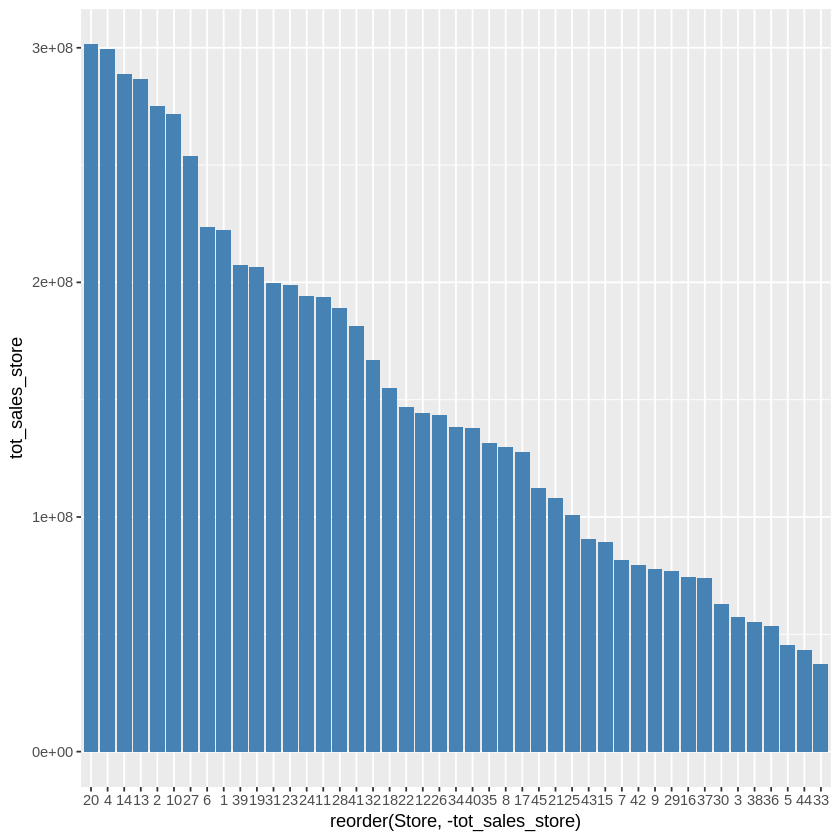

In [18]:
ggplot(data=Str_sales,aes(x=reorder(Store, -tot_sales_store), y=tot_sales_store))+
  geom_bar(stat="identity",fill="steelblue")

In [19]:
# which store has maximum standard deviation

var<-summarise(group_by(df,Store),sd(Weekly_Sales),mean(Weekly_Sales))
var

Store,sd(Weekly_Sales),mean(Weekly_Sales)
<fct>,<dbl>,<dbl>
1,155980.77,1555264.4
2,237683.69,1925751.3
3,46319.63,402704.4
4,266201.44,2094713.0
5,37737.97,318011.8
6,212525.86,1564728.2
7,112585.47,570617.3
8,106280.83,908749.5
9,69028.67,543980.6


In [20]:
colnames(var)[2]="Std_Store"
colnames(var)[3]="Mean_Store"
colnames(var)

[1] "Store"      "Std_Store"  "Mean_Store"

In [21]:
var[which.max(var$Std_Store),]

Store,Std_Store,Mean_Store
<fct>,<dbl>,<dbl>
14,317569.9,2020978


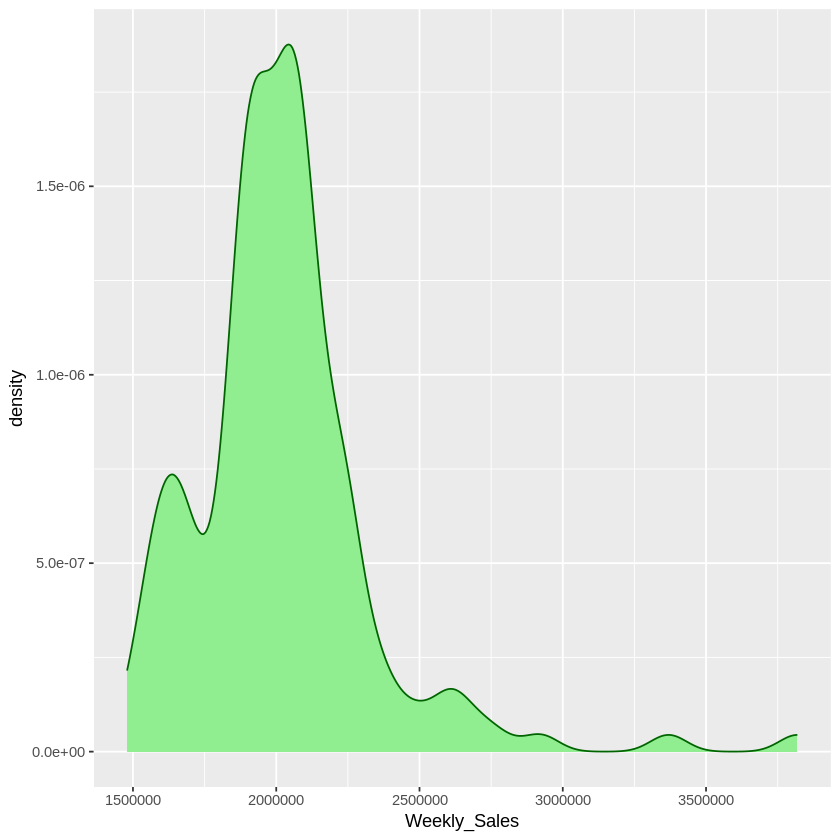

In [22]:
Str_14<-df[df$Store==14,]
ggplot(Str_14,aes(x=Weekly_Sales))+
  geom_density(color="Darkgreen", fill="lightgreen")

In [23]:
# which store has good quarterly growth in Q3 2012

df2<-df

In [24]:
df2$month_Year=substr(df2$Date,4,10)
df2$month_Year

[1] "02-2010" "02-2010" "02-2010" "02-2010" "03-2010" "03-2010" "03-2010"
   [8] "03-2010" "04-2010" "04-2010" "04-2010" "04-2010" "04-2010" "05-2010"
  [15] "05-2010" "05-2010" "05-2010" "06-2010" "06-2010" "06-2010" "06-2010"
  [22] "07-2010" "07-2010" "07-2010" "07-2010" "07-2010" "08-2010" "08-2010"
  [29] "08-2010" "08-2010" "09-2010" "09-2010" "09-2010" "09-2010" "10-2010"
  [36] "10-2010" "10-2010" "10-2010" "10-2010" "11-2010" "11-2010" "11-2010"
  [43] "11-2010" "12-2010" "12-2010" "12-2010" "12-2010" "12-2010" "01-2011"
  [50] "01-2011" "01-2011" "01-2011" "02-2011" "02-2011" "02-2011" "02-2011"
  [57] "03-2011" "03-2011" "03-2011" "03-2011" "04-2011" "04-2011" "04-2011"
  [64] "04-2011" "04-2011" "05-2011" "05-2011" "05-2011" "05-2011" "06-2011"
  [71] "06-2011" "06-2011" "06-2011" "07-2011" "07-2011" "07-2011" "07-2011"
  [78] "07-2011" "08-2011" "08-2011" "08-2011" "08-2011" "09-2011" "09-2011"
  [85] "09-2011" "09-2011" "09-2011" "10-2011" "10-2011" "10-2011" "10-2011"
  [92] "11-2011" "11-2011" "11-2011" "11-2011" "12-2011" "12-2011" "12-2011"
  [99] "12-2011" "12-2011" "01-2012" "01-2012" "01-2012" "01-2012" "02-2012"
 [106] "02-2012" "02-2012" "02-2012" "03-2012" "03-2012" "03-2012" "03-2012"
 [113] "03-2012" "04-2012" "04-2012" "04-2012" "04-2012" "05-2012" "05-2012"
 [120] "05-2012" "05-2012" "06-2012" "06-2012" "06-2012" "06-2012" "06-2012"
 [127] "07-2012" "07-2012" "07-2012" "07-2012" "08-2012" "08-2012" "08-2012"
 [134] "08-2012" "08-2012" "09-2012" "09-2012" "09-2012" "09-2012" "10-2012"
 [141] "10-2012" "10-2012" "10-2012" "02-2010" "02-2010" "02-2010" "02-2010"
 [148] "03-2010" "03-2010" "03-2010" "03-2010" "04-2010" "04-2010" "04-2010"
 [155] "04-2010" "04-2010" "05-2010" "05-2010" "05-2010" "05-2010" "06-2010"
 [162] "06-2010" "06-2010" "06-2010" "07-2010" "07-2010" "07-2010" "07-2010"
 [169] "07-2010" "08-2010" "08-2010" "08-2010" "08-2010" "09-2010" "09-2010"
 [176] "09-2010" "09-2010" "10-2010" "10-2010" "10-2010" "10-2010" "10-2010"
 [183] "11-2010" "11-2010" "11-2010" "11-2010" "12-2010" "12-2010" "12-2010"
 [190] "12-2010" "12-2010" "01-2011" "01-2011" "01-2011" "01-2011" "02-2011"
 [197] "02-2011" "02-2011" "02-2011" "03-2011" "03-2011" "03-2011" "03-2011"
 [204] "04-2011" "04-2011" "04-2011" "04-2011" "04-2011" "05-2011" "05-2011"
 [211] "05-2011" "05-2011" "06-2011" "06-2011" "06-2011" "06-2011" "07-2011"
 [218] "07-2011" "07-2011" "07-2011" "07-2011" "08-2011" "08-2011" "08-2011"
 [225] "08-2011" "09-2011" "09-2011" "09-2011" "09-2011" "09-2011" "10-2011"
 [232] "10-2011" "10-2011" "10-2011" "11-2011" "11-2011" "11-2011" "11-2011"
 [239] "12-2011" "12-2011" "12-2011" "12-2011" "12-2011" "01-2012" "01-2012"
 [246] "01-2012" "01-2012" "02-2012" "02-2012" "02-2012" "02-2012" "03-2012"
 [253] "03-2012" "03-2012" "03-2012" "03-2012" "04-2012" "04-2012" "04-2012"
 [260] "04-2012" "05-2012" "05-2012" "05-2012" "05-2012" "06-2012" "06-2012"
 [267] "06-2012" "06-2012" "06-2012" "07-2012" "07-2012" "07-2012" "07-2012"
 [274] "08-2012" "08-2012" "08-2012" "08-2012" "08-2012" "09-2012" "09-2012"
 [281] "09-2012" "09-2012" "10-2012" "10-2012" "10-2012" "10-2012" "02-2010"
 [288] "02-2010" "02-2010" "02-2010" "03-2010" "03-2010" "03-2010" "03-2010"
 [295] "04-2010" "04-2010" "04-2010" "04-2010" "04-2010" "05-2010" "05-2010"
 [302] "05-2010" "05-2010" "06-2010" "06-2010" "06-2010" "06-2010" "07-2010"
 [309] "07-2010" "07-2010" "07-2010" "07-2010" "08-2010" "08-2010" "08-2010"
 [316] "08-2010" "09-2010" "09-2010" "09-2010" "09-2010" "10-2010" "10-2010"
 [323] "10-2010" "10-2010" "10-2010" "11-2010" "11-2010" "11-2010" "11-2010"
 [330] "12-2010" "12-2010" "12-2010" "12-2010" "12-2010" "01-2011" "01-2011"
 [337] "01-2011" "01-2011" "02-2011" "02-2011" "02-2011" "02-2011" "03-2011"
 [344] "03-2011" "03-2011" "03-2011" "04-2011" "04-2011" "04-2011" "04-2011"
 [351] "04-2011" "05-2011" "05-2011" "05-2011" "05-2011" "06-2011" "06-2011"
 [358] "06-2011" "06-2011" "07-2011" "07-2011" "07-2011" "07-2011" "07-2011"

In [25]:
Q3_2012<-filter(df2,month_Year=="07-2012" | month_Year=="08-2012" | month_Year=="09-2012")
Q2_2012<-filter(df2,month_Year=="04-2012" | month_Year=="05-2012" | month_Year=="06-2012")

In [26]:
Q3_2012_Sales<-summarise(group_by(Q3_2012, Store), sum(Weekly_Sales))
Q3_2012_Sales

Store,sum(Weekly_Sales)
<fct>,<dbl>
1,20253948
2,24303355
3,5298005
4,27796792
5,4163791
6,20167312
7,8262787
8,11748953
9,7022150


In [27]:
colnames(Q3_2012_Sales)[2]<-"Q3_2012_Sales_by_Store"

In [28]:
Q2_2012_Sales<-summarise(group_by(Q2_2012, Store), sum(Weekly_Sales))
Q2_2012_Sales

Store,sum(Weekly_Sales)
<fct>,<dbl>
1,20978760
2,25083605
3,5620316
4,28454364
5,4466364
6,20833910
7,7290859
8,11919631
9,7484935


In [29]:
colnames(Q2_2012_Sales)[2]<-"Q2_2012_Sales_by_Store"

In [30]:
Q3_2012_Growthrate<-merge(Q2_2012_Sales,Q3_2012_Sales,by="Store")
Q3_2012_Growthrate

Store,Q2_2012_Sales_by_Store,Q3_2012_Sales_by_Store
<fct>,<dbl>,<dbl>
1,20978760,20253948
10,23750369,23037259
11,17787372,17516081
12,13362389,12536324
13,27009207,26421259
14,25155535,21187561
15,7955243,7612081
16,6564336,7121542
17,12592401,12459453


In [31]:
Q3_2012_Growthrate<-mutate(Q3_2012_Growthrate, Growth_Rate=((Q3_2012_Sales_by_Store-Q2_2012_Sales_by_Store)*100/Q2_2012_Sales_by_Store))
Q3_2012_Growthrate

Store,Q2_2012_Sales_by_Store,Q3_2012_Sales_by_Store,Growth_Rate
<fct>,<dbl>,<dbl>,<dbl>
1,20978760,20253948,-3.4549818
10,23750369,23037259,-3.0025235
11,17787372,17516081,-1.5251860
12,13362389,12536324,-6.1820101
13,27009207,26421259,-2.1768423
14,25155535,21187561,-15.7737639
15,7955243,7612081,-4.3136588
16,6564336,7121542,8.4883781
17,12592401,12459453,-1.0557786


In [32]:
positive_growthrate<-filter(Q3_2012_Growthrate,Growth_Rate>0)
positive_growthrate<-arrange(positive_growthrate,desc(Growth_Rate))
View(positive_growthrate)

Store,Q2_2012_Sales_by_Store,Q3_2012_Sales_by_Store,Growth_Rate
<fct>,<dbl>,<dbl>,<dbl>
7,7290859,8262787,13.3307760
16,6564336,7121542,8.4883781
35,10838313,11322421,4.4666372
26,13155336,13675692,3.9554775
39,20214128,20715116,2.4784040
41,17659943,18093844,2.4569801
44,4306406,4411251,2.4346377
24,17684219,17976378,1.6520877
40,12727738,12873195,1.1428413


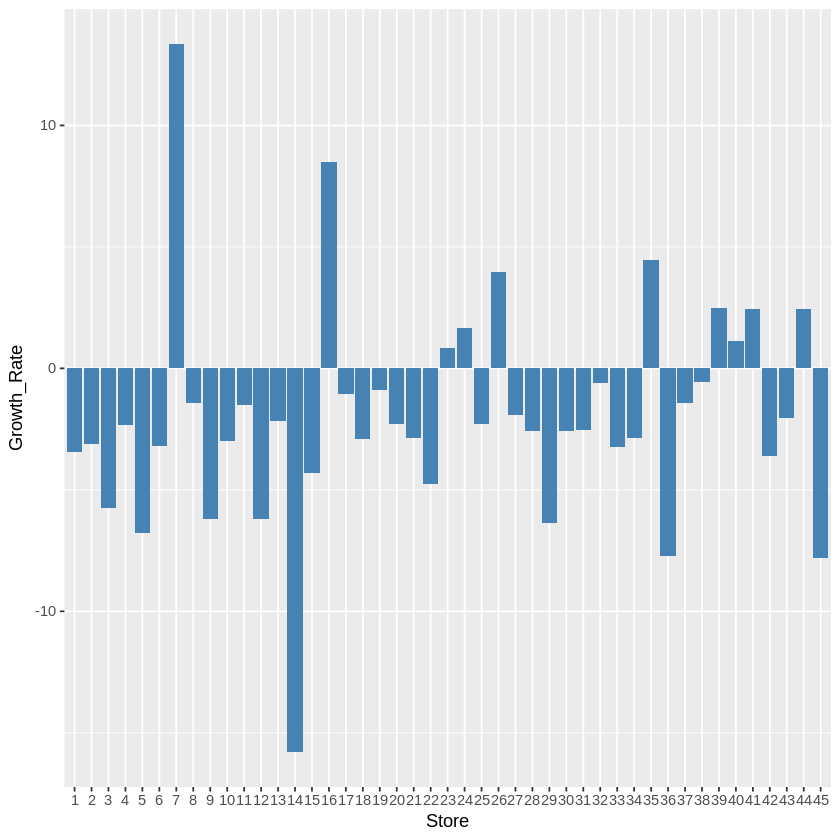

In [33]:
ggplot(data=Q3_2012_Growthrate,aes(x=Store, y=Growth_Rate))+
  geom_bar(stat="identity",fill="Steelblue")

In [34]:
# provide a monthly and semester view of sales in units and give insights

x<-as.factor(df2$Date)

In [35]:
abis<-strptime(x,format="%d-%m-%Y")

In [36]:
df2$month_Year<-as.Date(abis,format="%Y-%m-%d")

In [37]:
Month_Year_Sales<-summarise(group_by(df2,month_Year),sum(Weekly_Sales))
colnames(Month_Year_Sales)[2]<-"Sales_by_Month"
Month_Year_Sales<-as.data.frame(Month_Year_Sales)
Month_Year_Sales

month_Year,Sales_by_Month
<date>,<dbl>
2010-02-05,49750740
2010-02-12,48336678
2010-02-19,48276994
2010-02-26,43968571
2010-03-05,46871470
2010-03-12,45925397
2010-03-19,44988975
2010-03-26,44133961
2010-04-02,50423831


In [38]:
Month_Year_Sales$month_Year<-as.character(Month_Year_Sales$month_Year)
Month_Year_Sales$month_Year<-factor(Month_Year_Sales$month_Year,levels=Month_Year_Sales$month_Year)
Month_Year_Sales$month_Year

[1] 2010-02-05 2010-02-12 2010-02-19 2010-02-26 2010-03-05 2010-03-12
  [7] 2010-03-19 2010-03-26 2010-04-02 2010-04-09 2010-04-16 2010-04-23
 [13] 2010-04-30 2010-05-07 2010-05-14 2010-05-21 2010-05-28 2010-06-04
 [19] 2010-06-11 2010-06-18 2010-06-25 2010-07-02 2010-07-09 2010-07-16
 [25] 2010-07-23 2010-07-30 2010-08-06 2010-08-13 2010-08-20 2010-08-27
 [31] 2010-09-03 2010-09-10 2010-09-17 2010-09-24 2010-10-01 2010-10-08
 [37] 2010-10-15 2010-10-22 2010-10-29 2010-11-05 2010-11-12 2010-11-19
 [43] 2010-11-26 2010-12-03 2010-12-10 2010-12-17 2010-12-24 2010-12-31
 [49] 2011-01-07 2011-01-14 2011-01-21 2011-01-28 2011-02-04 2011-02-11
 [55] 2011-02-18 2011-02-25 2011-03-04 2011-03-11 2011-03-18 2011-03-25
 [61] 2011-04-01 2011-04-08 2011-04-15 2011-04-22 2011-04-29 2011-05-06
 [67] 2011-05-13 2011-05-20 2011-05-27 2011-06-03 2011-06-10 2011-06-17
 [73] 2011-06-24 2011-07-01 2011-07-08 2011-07-15 2011-07-22 2011-07-29
 [79] 2011-08-05 2011-08-12 2011-08-19 2011-08-26 2011-09-02 2011-09-09
 [85] 2011-09-16 2011-09-23 2011-09-30 2011-10-07 2011-10-14 2011-10-21
 [91] 2011-10-28 2011-11-04 2011-11-11 2011-11-18 2011-11-25 2011-12-02
 [97] 2011-12-09 2011-12-16 2011-12-23 2011-12-30 2012-01-06 2012-01-13
[103] 2012-01-20 2012-01-27 2012-02-03 2012-02-10 2012-02-17 2012-02-24
[109] 2012-03-02 2012-03-09 2012-03-16 2012-03-23 2012-03-30 2012-04-06
[115] 2012-04-13 2012-04-20 2012-04-27 2012-05-04 2012-05-11 2012-05-18
[121] 2012-05-25 2012-06-01 2012-06-08 2012-06-15 2012-06-22 2012-06-29
[127] 2012-07-06 2012-07-13 2012-07-20 2012-07-27 2012-08-03 2012-08-10
[133] 2012-08-17 2012-08-24 2012-08-31 2012-09-07 2012-09-14 2012-09-21
[139] 2012-09-28 2012-10-05 2012-10-12 2012-10-19 2012-10-26
143 Levels: 2010-02-05 2010-02-12 2010-02-19 2010-02-26 ... 2012-10-26

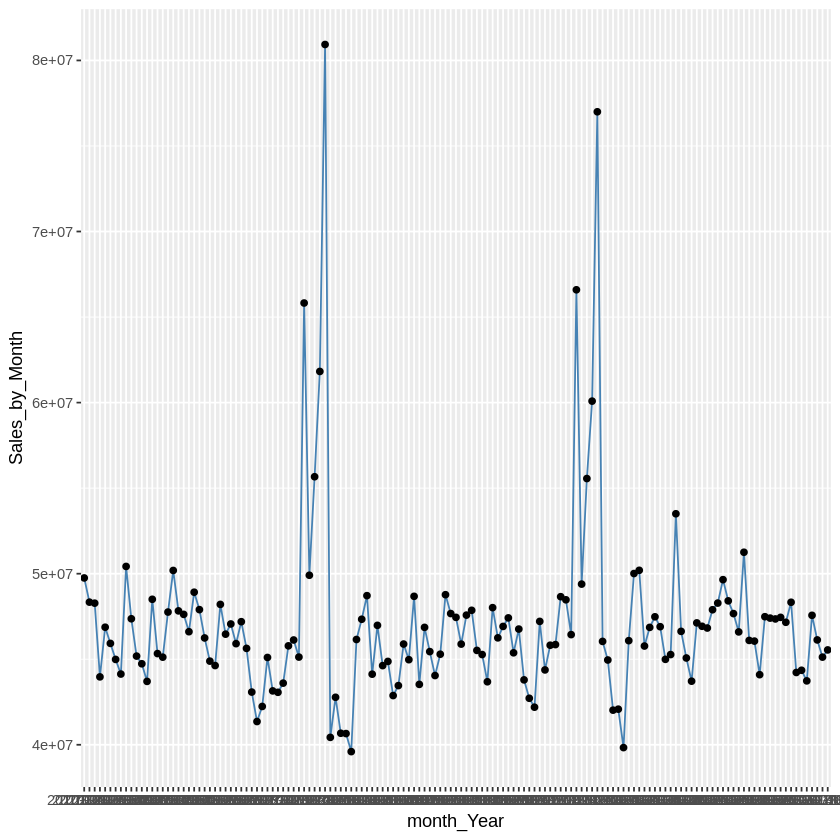

In [39]:
ggplot(data=Month_Year_Sales,aes(x=month_Year,y=Sales_by_Month,group=1))+
  geom_line(color="Steelblue")+
  geom_point()

In [40]:
df2$Date<-dmy(df2$Date)

In [41]:
df2$sem<-semester(df2$Date, with_year=TRUE)

In [42]:
s<-aggregate(Weekly_Sales~sem,data=df2,sum)
s

sem,Weekly_Sales
<dbl>,<dbl>
2010.1,982622260
2010.2,1306263860
2011.1,1127339797
2011.2,1320860210
2012.1,1210765416
2012.2,789367443


In [43]:
s$sem_year<-paste(substr(s$sem,1,4),"-s",substr(s$sem,6,6),sep=" ")
s$sem_year

[1] "2010 -s 1" "2010 -s 2" "2011 -s 1" "2011 -s 2" "2012 -s 1" "2012 -s 2"

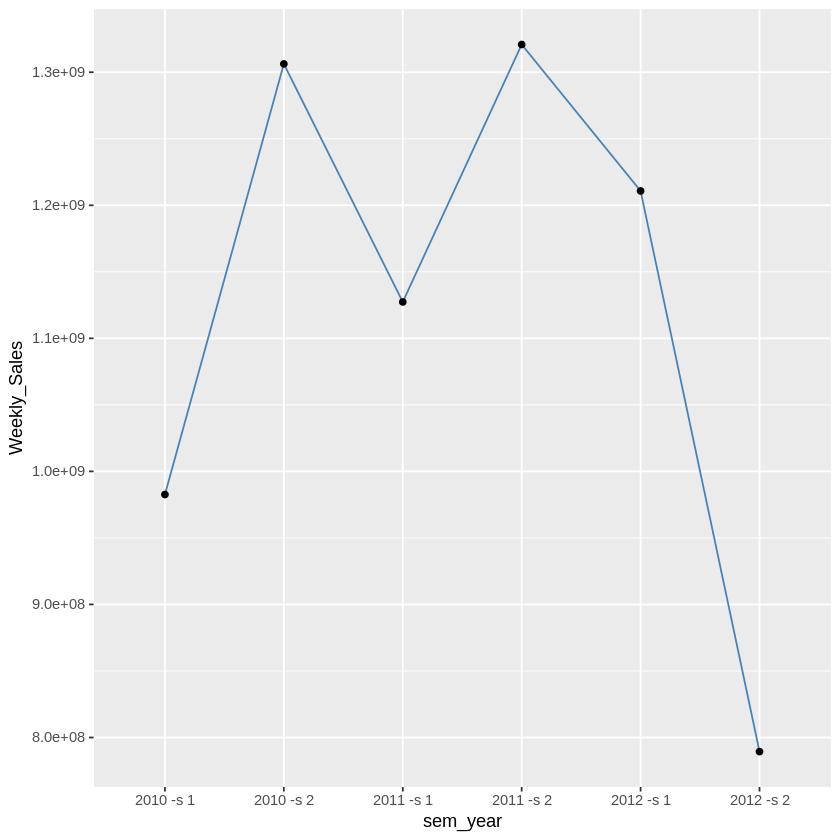

In [44]:
ggplot(data=s,aes(x=sem_year,y=Weekly_Sales,group=1))+
  geom_line(color="Steelblue")+
  geom_point()